# Redes Neuronales Artificiales - MLP


Con el fin de obtener un acierto mayor, necesitamos darle  más libertad a la red neuronal; esto significa que una red neuronal necesita más de una capa para extraer los patrones subyacentes de los datos de entrenamiento. 

En importante tener en cuenta que una ANN puede ser usada como clasificador o como regresor (predicción). Para este ejercicio utilizaremos la red neuronal como regresor. Vamos a generar algunos datos basados en la e ecuación:
$$y = 3x^{2}+5$$

Posteriormente normalizaremos los datos

In [9]:
#importamos las librerías necesarias
import numpy as np 
import matplotlib.pyplot as plt 
import neurolab as nl

In [2]:
#generamos algunos datos de entrenamiento
val_min = -15 #definimos el mínimo
val_max = 15 #definimos el máximo
num_datos = 130 #definimos el número de datos
x = np.linspace(val_min, val_max, num_datos) #generamos un vector lineal
y = (3*x**2)+5 #generamos la función a la que queremos aplicar la regresión
y /= np.linalg.norm(y) #normalizamos los datos de la función sobre la norma

In [3]:
#creamos los datos y las etiquetas
X = x.reshape(num_datos, 1) #en este caso la variable independiente es la matriz de observaciones
y = y.reshape(num_datos, 1) #y la variable dependiente es la matriz de etiquetas

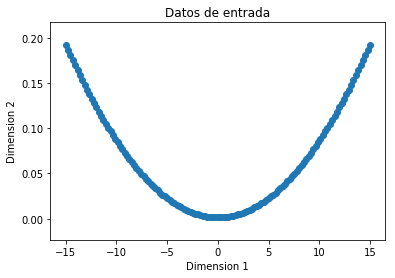

In [4]:
#graficamos los datos de entrada
plt.figure() 
plt.scatter(X, y) 
plt.xlabel('Dimension 1') 
plt.ylabel('Dimension 2') 
plt.title('Datos de entrada')
plt.show()

In [5]:
#definiremos una red neuronal multicapa con dos capas ocultas. Eres libre
#de diseñar una red neuronal de la forma en que prefieras. Para este caso
#tendremos 10 neuronas en la primera capa y 6 neuronas en la segunda
#como nuestra tarea es predecir el valor, la capa de salida tendrá
#una única neurona (feedoforward)
nn = nl.net.newff([[val_min, val_max]], [10, 6, 1])
#establecemos el algoritmo de entrenamiento como gradiente descendiente, es el algoritmo que minimizará la función objetivo 
#que representa el error
nn.trainf = nl.train.train_gd
#entrenamos la red neuronal con los datos generados
progreso_error = nn.train(X, y, epochs = 2000, show =100, goal = 0.01)

Epoch: 100; Error: 0.020663948483015834;
The goal of learning is reached


In [7]:
#Validamos la red neuronal sobre los mismos datos de entrenamiento para calcular la regresión
output = nn.sim(X)
y_pred = output.reshape(num_datos)

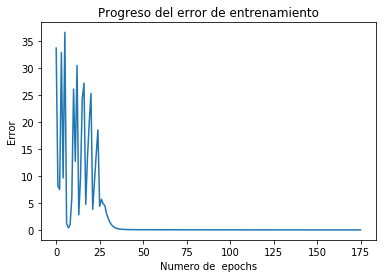

In [8]:
#graficamos el progreso de entrenamiento
plt.figure() 
plt.plot(progreso_error) 
plt.xlabel('Numero de  epochs') 
plt.ylabel('Error') 
plt.title('Progreso del error de entrenamiento')
plt.show()

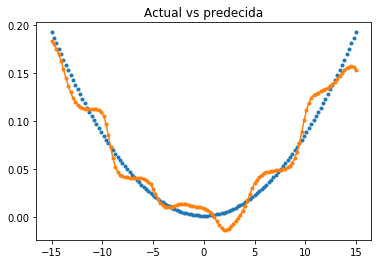

In [9]:
#Graficamos la salida
plt.figure() 
plt.plot(x, y, '.', x, y_pred,'.-') 
plt.title('Actual vs predecida') 
 
plt.show()

** Actividad 1 **

Ahora que ya sabes como agregar más capas a la red neuronal, construye una red nueronal multi-capa para **clasificar** los datos que se encuentran en el archivo $\verb|data_simple_nn.txt|$. En esta ocasión los datos de entrada tienen cuatro columnas. Los dos primeros son las características y los otros dos conforman las etiquetas. Se utilizan dos dígitos porque tenemos cuatro clases, por tanto se requieren dos bits para representar las etiquetas. 

Recuerda que debes instanciar la red con la función $\verb|nl.net.newff()|$, pero los argumentos son diferentes a los del ejemplo anterior. Necesitas 2 dimensiones (1 para cada característica) en la entrada y definir el número de neuronas en cada capa. Para lograr esto debes combinar lo que aprendiste con el perceptrón y lo que está en este notebook.

In [5]:
#espacio para resolver la actividad 1
from sklearn.model_selection import train_test_split
data = np.genfromtxt('data_simple_nn.txt',delimiter='')

X = data[:,0:2]
y = data[:,2:4]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 5)


In [11]:
def remocion(X_train, X_test):
    media = X_train.mean(axis = 0)
    desviacion = X_train.std(axis = 0)
    X_train_prepro = (X_train - media)/desviacion
    X_test_prepro = (X_test - media)/desviacion
    return X_train_prepro, X_test_prepro


X_train_preproR, X_test_preproR = remocion(X_train, X_test)

dim1min,dim1max = X_train_preproR[:,0].min(), X_train_preproR[:,0].max()
dim2min,dim2max = X_train_preproR[:,1].min(), X_train_preproR[:,1].max()


nn = nl.net.newff([[dim1min, dim1max],[dim2min, dim2max]], [5, 2])
nn.train(X_train_preproR, y_train, epochs = 200, show =10, goal = 0.01)


Epoch: 10; Error: 0.6202748880280773;
The goal of learning is reached


[10.112034107841664,
 1.671062426822921,
 1.0416481236779798,
 1.0205807972713181,
 1.0107050326974991,
 1.0070731315220993,
 1.002215372946531,
 1.0004229288658444,
 0.9983539055444776,
 0.6202748880280773,
 0.6201973785721286,
 0.4282786074959777,
 0.16781008238906442,
 0.06699073782398184,
 0.01828209910383446,
 0.007955454711386352]

In [17]:
print(X_test)
output = nn.sim(X_test_preproR)
print(output)


[[7.2 4.1]
 [1.1 3.9]
 [7.1 4.2]
 [1.2 4.1]]
[[-0.07828161  0.99995614]
 [ 0.08558031  0.09000504]
 [-0.06075878  0.99995841]
 [ 0.10269181  0.18097774]]


In [34]:
output2 = np.zeros(output.shape)
umbral = 0.8
for i in range(output.shape[0]):
    for j in range(output.shape[1]):
        if output[i,j] < umbral:
            output2[i,j] = 0
        if output[i,j] > umbral:
            output2[i,j] = 1
print(output2)
error = 0
print(y_test)
for i in range(output.shape[0]):
    print(i,output2[i,0],y_test[i,0])
    print(i,output2[i,1],y_test[i,1])
    if output2[i,0] != y_test[i,0] or output2[i,1] != y_test[i,1]:
        error = error + 1
    

print(error)


[[0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]]
[[0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]]
0 0.0 0.0
0 1.0 1.0
1 0.0 0.0
1 0.0 0.0
2 0.0 0.0
2 1.0 1.0
3 0.0 0.0
3 0.0 0.0
0
